Using the dataset as https://www.kaggle.com/c/contradictory-my-dear-watson/data, build the
classification model to predict if the two sentences are in entailment, neutral or contradiction.
The project should follow the guideline as:
1. Pre-process the data
2. Perform data exploration
3. Use BERT to build the model, including the classification_report
4. Use GPT to build the model
5. Use Ollama to build the model
6. Write up analysis and conclusions

In [ ]:
#
!pip install numpy==1.26.4 --upgrade --force-reinstall
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
# Mount your Google Drive so we can save files there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataframe from the csv
import pandas as pd

file_path = '/content/drive/My Drive/Watson_project_files/train.csv'
df = pd.read_csv(file_path)

df.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [ ]:
!pip install transformers datasets scikit-learn torch pandas matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

## **Preprocessing the data**

In [ ]:
import pandas as pd
import re
import joblib
from sklearn.preprocessing import LabelEncoder

# --- Load data ---
file_path = '/content/drive/My Drive/Watson_project_files/train.csv'  # adjust this path
df = pd.read_csv(file_path)

# --- Language-aware text cleaning ---
def clean_text(text, lang):
    text = str(text).strip()
    if lang == 'en':
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s]', '', text)
    else:
        text = re.sub(r'\s+', ' ', text)
    return text

df['premise'] = df.apply(lambda row: clean_text(row['premise'], row['lang_abv']), axis=1)
df['hypothesis'] = df.apply(lambda row: clean_text(row['hypothesis'], row['lang_abv']), axis=1)

# --- Encode labels ---
label_enc = LabelEncoder()
df['label'] = label_enc.fit_transform(df['label'])

# --- Save the label encoder ---
encoder_path = '/content/drive/My Drive/Watson_project_files/label_encoder.pkl'
joblib.dump(label_enc, encoder_path)
print(f"LabelEncoder saved to: {encoder_path}")

# --- Final check ---
print(df.head())
print("Unique labels:", label_enc.classes_)


LabelEncoder saved to: /content/drive/My Drive/Watson_project_files/label_encoder.pkl
           id                                            premise  \
0  5130fd2cb5  and these comments were considered in formulat...   
1  5b72532a0b  these are issues that we wrestle with in pract...   
2  3931fbe82a  Des petites choses comme celles-là font une di...   
3  5622f0c60b  you know they cant really defend themselves li...   
4  86aaa48b45  ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...   

                                          hypothesis lang_abv language  label  
0  the rules developed in the interim were put to...       en  English      0  
1  practice groups are not permitted to work on t...       en  English      2  
2              J'essayais d'accomplir quelque chose.       fr   French      0  
3   they cant defend themselves because of their age       en  English      0  
4    เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร       th     Thai      1  
Unique labels: [0 1 2]


## **Data Exploration**

<ipython-input-4-78dcec0d2ced>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='Set2')


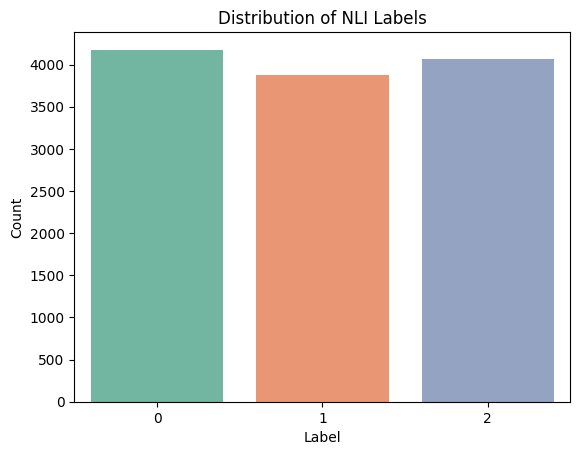

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

label_names = label_enc.inverse_transform([0, 1, 2])
sns.countplot(x=df['label'], palette='Set2')
plt.xticks([0, 1, 2], label_names)
plt.title('Distribution of NLI Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


## **Analysis of Label Distribution Plot**
The plot shows a balanced distribution among the three NLI classes: entailment (0), neutral (1), and contradiction (2). Entailment has the highest count, while neutral is slightly less represented. Overall, this balance is good for training, reducing the risk of model bias toward any specific class.

<ipython-input-5-fd7cfeeec6d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='language', order=df['language'].value_counts().index, palette='Paired')


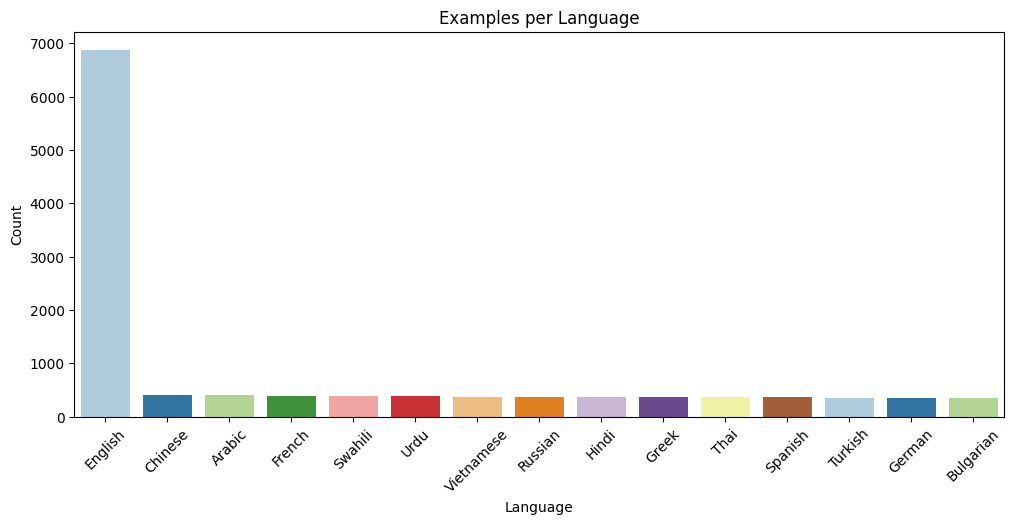

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='language', order=df['language'].value_counts().index, palette='Paired')
plt.xticks(rotation=45)
plt.title('Examples per Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


## **Analysis of Language Distribution Plot**
The dataset is highly imbalanced in terms of language representation. English dominates with nearly 7,000 examples, while all other languages have significantly fewer samples (around 300–400 each). This imbalance may affect multilingual model performance, favoring English over other languages during training.

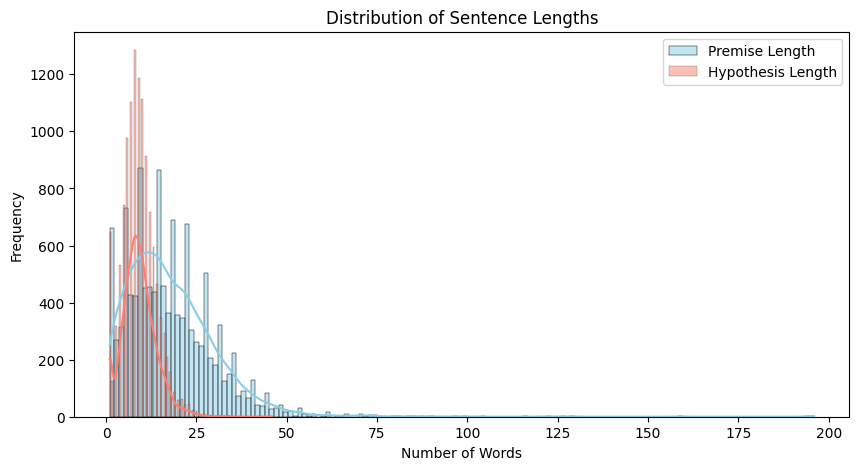

In [ ]:
df['premise_len'] = df['premise'].apply(lambda x: len(x.split()))
df['hypothesis_len'] = df['hypothesis'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['premise_len'], label='Premise Length', color='skyblue', kde=True)
sns.histplot(df['hypothesis_len'], label='Hypothesis Length', color='salmon', kde=True)
plt.legend()
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


## **Analysis of Sentence Length Distribution Plot**
The plot shows that most premises and hypotheses are under 30 words, with a peak between 10–20 words. Premises tend to be slightly longer and more varied in length than hypotheses. The distributions are right-skewed, indicating a few very long sentences. This suggests most data is concise, which is ideal for many NLP models.

## **Split data into train / validation / test**

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train (80%) and temp (20%)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Split temp into validation (10%) and test (10%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))


Train size: 9696
Validation size: 1212
Test size: 1212


## **Tokenize data**

In [ ]:
import pandas as pd
import re
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

# Load tokenizer
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
# model_name = 'microsoft/deberta-v3-base'
# tokenizer = DebertaV2Tokenizer.from_pretrained(model_name)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenize function
def tokenize_function(examples):
    return tokenizer(examples['premise'], examples['hypothesis'], truncation=True, padding='max_length', max_length=128)

# Apply tokenization
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Remove non-model columns for training
for col in ['premise', 'hypothesis', 'lang_abv', '__index_level_0__']:
    if col in train_dataset.column_names:
        train_dataset = train_dataset.remove_columns(col)
    if col in val_dataset.column_names:
        val_dataset = val_dataset.remove_columns(col)
    if col in test_dataset.column_names:
        test_dataset = test_dataset.remove_columns(col)

# Set format for PyTorch
datasets = [train_dataset, val_dataset, test_dataset]
for ds in datasets:
    ds.set_format('torch')

print("Prepared datasets ready for Trainer!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Prepared datasets ready for Trainer!


In [ ]:
!pip install datasets

## **BERT model - training**

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, f1_score

# Initialize the model
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',           # Output directory for model checkpoints
    eval_strategy='epoch',      # Evaluation at the end of each epoch
    save_strategy='epoch',           # Save checkpoint at the end of each epoch
    learning_rate=2e-5,              # Learning rate for training
    per_device_train_batch_size=16,  # Training batch size per device (GPU/CPU)
    per_device_eval_batch_size=16,   # Evaluation batch size per device
    num_train_epochs=10,              # Number of epochs to train the model
    weight_decay=0.01,               # Weight decay to avoid overfitting
    logging_dir='./logs',            # Directory for logs
    logging_steps=10,                # Log every 10 steps
    load_best_model_at_end=True,     # Load the best model when finished training
    metric_for_best_model='accuracy',  # Metric to evaluate the best model
    save_total_limit=2               # Only keep the last 2 checkpoints
)

# Define metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = torch.argmax(torch.tensor(logits), axis=1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {"accuracy": acc, "f1": f1}

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()



model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vandana-jv (vandana-jv-xxxx) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.747100,0.822770,0.640264,0.640904
2,0.621800,0.878478,0.641914,0.642991
3,0.445000,0.947333,0.660066,0.660576
4,0.251100,1.314761,0.650990,0.651127
5,0.188000,1.920797,0.632013,0.631036
6,0.229300,2.187290,0.635314,0.636184
7,0.062500,2.490938,0.626238,0.626048
8,0.074400,2.604339,0.643564,0.644567


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.747100,0.822770,0.640264,0.640904
2,0.621800,0.878478,0.641914,0.642991
3,0.445000,0.947333,0.660066,0.660576
4,0.251100,1.314761,0.650990,0.651127
5,0.188000,1.920797,0.632013,0.631036
6,0.229300,2.187290,0.635314,0.636184
7,0.062500,2.490938,0.626238,0.626048
8,0.074400,2.604339,0.643564,0.644567
9,0.081300,2.667902,0.644389,0.645533
10,0.097800,2.712727,0.639439,0.639751


TrainOutput(global_step=6060, training_loss=0.2755485041646391, metrics={'train_runtime': 2701.6587, 'train_samples_per_second': 35.889, 'train_steps_per_second': 2.243, 'total_flos': 6377869245726720.0, 'train_loss': 0.2755485041646391, 'epoch': 10.0})

## **Classification Report**

In [ ]:
# --- Optional: Evaluate on the test set ---
test_predictions = trainer.predict(test_dataset)
y_test_true = test_df['label'].values  # ensure it's a NumPy array
y_test_pred = test_predictions.predictions.argmax(axis=-1)

from sklearn.metrics import classification_report

# Convert label encoder classes to list of string names (as strings, not numbers)
class_names = [str(cls) for cls in label_enc.classes_]

# Print classification report
print(classification_report(y_test_true, y_test_pred, target_names=class_names))


              precision    recall  f1-score   support

           0       0.69      0.65      0.67       418
           1       0.60      0.66      0.63       388
           2       0.69      0.67      0.68       406

    accuracy                           0.66      1212
   macro avg       0.66      0.66      0.66      1212
weighted avg       0.66      0.66      0.66      1212



#**New 2 changes code**

In [ ]:
import pandas as pd
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
import torch
from sklearn.metrics import accuracy_score, f1_score

# --- Load data ---
file_path = '/content/drive/My Drive/Watson_project_files/train.csv'
df = pd.read_csv(file_path)

# --- Language-aware cleaning ---
def clean_text(text, lang):
    text = str(text).strip()
    if lang == 'en':
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s]', '', text)
    else:
        text = re.sub(r'\s+', ' ', text)
    return text

df['premise'] = df.apply(lambda row: clean_text(row['premise'], row['lang_abv']), axis=1)
df['hypothesis'] = df.apply(lambda row: clean_text(row['hypothesis'], row['lang_abv']), axis=1)

# --- Encode labels ---
label_enc = LabelEncoder()
df['label'] = label_enc.fit_transform(df['label'])
joblib.dump(label_enc, '/content/drive/My Drive/Watson_project_files/label_encoder.pkl')

# --- Split dataset ---
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

# --- Convert to HuggingFace Datasets ---
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# --- Tokenization ---
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
def tokenize_function(examples):
    return tokenizer(examples['premise'], examples['hypothesis'], truncation=True, padding='max_length', max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# --- Remove unused columns ---
drop_cols = ['premise', 'hypothesis', 'lang_abv', '__index_level_0__']
for col in drop_cols:
    for ds in [train_dataset, val_dataset, test_dataset]:
        if col in ds.column_names:
            ds = ds.remove_columns(col)

# --- Set PyTorch format ---
for ds in [train_dataset, val_dataset, test_dataset]:
    ds.set_format('torch')

# --- Define model ---
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)

# --- Training arguments with early stopping & lower LR ---
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=1e-5,  # Lower LR
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    save_total_limit=2
)

# --- Metrics ---
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = torch.argmax(torch.tensor(logits), axis=1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {"accuracy": acc, "f1": f1}

# --- Trainer with early stopping ---
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

# --- Train! ---
trainer.train()


Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.833500,0.832683,0.630363,0.628710
2,0.649400,0.906215,0.624587,0.624046
3,0.571300,0.989461,0.646865,0.647473
4,0.540000,1.282543,0.627063,0.627979
5,0.395000,1.860855,0.622112,0.623394
6,0.288400,2.044112,0.653465,0.653784
7,0.124900,2.331286,0.650165,0.650932
8,0.196700,2.529382,0.642739,0.643518
9,0.004700,2.707031,0.634488,0.635607


TrainOutput(global_step=10908, training_loss=0.3899462503867055, metrics={'train_runtime': 2790.9716, 'train_samples_per_second': 34.741, 'train_steps_per_second': 4.343, 'total_flos': 5740082321154048.0, 'train_loss': 0.3899462503867055, 'epoch': 9.0})

In [ ]:
# ---Classification report ---
test_predictions = trainer.predict(test_dataset)
y_test_true = test_df['label'].values  # ensure it's a NumPy array
y_test_pred = test_predictions.predictions.argmax(axis=-1)

from sklearn.metrics import classification_report

# Convert label encoder classes to list of string names (as strings, not numbers)
class_names = [str(cls) for cls in label_enc.classes_]

# Print classification report
print(classification_report(y_test_true, y_test_pred, target_names=class_names))


              precision    recall  f1-score   support

           0       0.70      0.64      0.67       418
           1       0.65      0.61      0.63       388
           2       0.61      0.69      0.65       406

    accuracy                           0.65      1212
   macro avg       0.65      0.65      0.65      1212
weighted avg       0.65      0.65      0.65      1212



## **BERT with class weights**

In [ ]:
import pandas as pd
import re
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, f1_score

# --- Load data ---
file_path = '/content/drive/My Drive/Watson_project_files/train.csv'
df = pd.read_csv(file_path)

# Step 1: Preprocessing
def clean_text(text, lang):
    text = text.strip()
    if lang == 'en':
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s]', '', text)
    else:
        text = re.sub(r'\s+', ' ', text)
    return text

df['premise'] = df.apply(lambda row: clean_text(row['premise'], row['lang_abv']), axis=1)
df['hypothesis'] = df.apply(lambda row: clean_text(row['hypothesis'], row['lang_abv']), axis=1)

label_enc = LabelEncoder()
df['label_enc'] = label_enc.fit_transform(df['label'])

train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label_enc'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label_enc'])

# Step 2: Convert to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df[['premise', 'hypothesis', 'label_enc']])
val_dataset = Dataset.from_pandas(val_df[['premise', 'hypothesis', 'label_enc']])
test_dataset = Dataset.from_pandas(test_df[['premise', 'hypothesis', 'label_enc']])

# Step 3: Tokenization
model_name = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(
        examples['premise'],
        examples['hypothesis'],
        truncation=True,
        padding='max_length',
        max_length=80  # reduced from 128
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.rename_column('label_enc', 'labels')
val_dataset = val_dataset.rename_column('label_enc', 'labels')
test_dataset = test_dataset.rename_column('label_enc', 'labels')

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

# Step 4: Compute class weights (optional — enable if needed)
use_class_weights = True
if use_class_weights:
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_df['label_enc']), y=train_df['label_enc'])
    class_weights = torch.tensor(class_weights, dtype=torch.float)
else:
    class_weights = None

# Step 5: Load model with fixed compute_loss
from transformers import XLMRobertaForSequenceClassification

class WeightedXLMRoberta(XLMRobertaForSequenceClassification):
    def compute_loss(self, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = self(**inputs)
        logits = outputs.logits
        if class_weights is not None:
            loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))
        else:
            loss_fct = torch.nn.CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

model = WeightedXLMRoberta.from_pretrained(model_name, num_labels=len(label_enc.classes_))

# Step 6: Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# Step 7: Setup Trainer
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,  # reduced from 5e-5
    per_device_train_batch_size=8,  # reduced from 16
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.01,
    warmup_ratio=0.1,
    lr_scheduler_type='cosine',
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    gradient_accumulation_steps=2,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# Step 8: Train
trainer.train()


Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Some weights of WeightedXLMRoberta were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.113000,1.048485,0.476073,0.466879
2,0.993400,0.775975,0.677393,0.677766
3,0.778000,0.719264,0.710396,0.708768
4,0.625000,0.788284,0.711221,0.708087
5,0.359900,0.879788,0.698845,0.699215
6,0.253900,1.249451,0.708746,0.708336
7,0.199900,1.579687,0.718647,0.719097
8,0.161700,1.721084,0.712046,0.711154
9,0.141800,1.776161,0.716997,0.716459
10,0.104200,1.789142,0.717822,0.717705


TrainOutput(global_step=6060, training_loss=0.4409745760089887, metrics={'train_runtime': 2581.5996, 'train_samples_per_second': 37.558, 'train_steps_per_second': 2.347, 'total_flos': 3986168278579200.0, 'train_loss': 0.4409745760089887, 'epoch': 10.0})

In [ ]:
# Step 9: Evaluate on test set
test_results = trainer.predict(test_dataset)
y_test_true = np.array(test_df['label_enc'])
y_test_pred = np.argmax(test_results.predictions, axis=-1)

# Convert label names to string for classification_report
label_names = [str(name) for name in label_enc.classes_]

print(classification_report(y_test_true, y_test_pred, target_names=label_names))


              precision    recall  f1-score   support

           0       0.75      0.72      0.73       418
           1       0.67      0.67      0.67       388
           2       0.72      0.76      0.74       406

    accuracy                           0.72      1212
   macro avg       0.71      0.71      0.71      1212
weighted avg       0.72      0.72      0.72      1212



In [ ]:
import pandas as pd
import re
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, f1_score

# --- Load data ---
file_path = '/content/drive/My Drive/Watson_project_files/train.csv'
df = pd.read_csv(file_path)

# Step 1: Preprocessing
def clean_text(text, lang):
    text = text.strip()
    if lang == 'en':
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s]', '', text)
    else:
        text = re.sub(r'\s+', ' ', text)
    return text

df['premise'] = df.apply(lambda row: clean_text(row['premise'], row['lang_abv']), axis=1)
df['hypothesis'] = df.apply(lambda row: clean_text(row['hypothesis'], row['lang_abv']), axis=1)

label_enc = LabelEncoder()
df['label_enc'] = label_enc.fit_transform(df['label'])

train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label_enc'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label_enc'])

# Step 2: Convert to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df[['premise', 'hypothesis', 'label_enc']])
val_dataset = Dataset.from_pandas(val_df[['premise', 'hypothesis', 'label_enc']])
test_dataset = Dataset.from_pandas(test_df[['premise', 'hypothesis', 'label_enc']])

# Step 3: Tokenization
model_name = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(
        examples['premise'],
        examples['hypothesis'],
        truncation=True,
        padding='max_length',
        max_length=80  # reduced from 128
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.rename_column('label_enc', 'labels')
val_dataset = val_dataset.rename_column('label_enc', 'labels')
test_dataset = test_dataset.rename_column('label_enc', 'labels')

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

# Step 4: Compute class weights (optional — enable if needed)
use_class_weights = True
if use_class_weights:
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_df['label_enc']), y=train_df['label_enc'])
    class_weights = torch.tensor(class_weights, dtype=torch.float)
else:
    class_weights = None

# Step 5: Load model with fixed compute_loss
from transformers import XLMRobertaForSequenceClassification

class WeightedXLMRoberta(XLMRobertaForSequenceClassification):
    def compute_loss(self, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = self(**inputs)
        logits = outputs.logits
        if class_weights is not None:
            loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))
        else:
            loss_fct = torch.nn.CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

model = WeightedXLMRoberta.from_pretrained(model_name, num_labels=len(label_enc.classes_))

# Step 6: Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# Step 7: Setup Trainer
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,  # reduced from 5e-5
    per_device_train_batch_size=6,  # reduced from 16
    per_device_eval_batch_size=6,
    num_train_epochs=15,
    weight_decay=0.01,
    warmup_ratio=0.1,
    lr_scheduler_type='cosine',
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    gradient_accumulation_steps=2,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# Step 8: Train
trainer.train()


Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Some weights of WeightedXLMRoberta were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.102000,1.038885,0.462046,0.381927
2,0.948700,0.797718,0.655116,0.657039
3,0.794400,0.736711,0.712046,0.712403
4,0.572600,0.759363,0.711221,0.709791
5,0.422700,0.921386,0.717822,0.717489
6,0.318200,1.046504,0.721947,0.722147
7,0.251600,1.628066,0.706271,0.705656
8,0.200800,1.763730,0.716172,0.716384
9,0.133600,1.957317,0.701320,0.701330


TrainOutput(global_step=7272, training_loss=0.5240521714238837, metrics={'train_runtime': 2673.9443, 'train_samples_per_second': 54.392, 'train_steps_per_second': 4.533, 'total_flos': 3587551450721280.0, 'train_loss': 0.5240521714238837, 'epoch': 9.0})

In [ ]:

# Step 9: Evaluate on test set
test_results = trainer.predict(test_dataset)
y_test_true = np.array(test_df['label_enc'])
y_test_pred = np.argmax(test_results.predictions, axis=-1)

# Convert label names to string for classification_report
label_names = [str(name) for name in label_enc.classes_]

print(classification_report(y_test_true, y_test_pred, target_names=label_names))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       418
           1       0.69      0.66      0.68       388
           2       0.70      0.77      0.73       406

    accuracy                           0.71      1212
   macro avg       0.71      0.71      0.71      1212
weighted avg       0.71      0.71      0.71      1212



### **GPT with gpt2 model**

In [ ]:
import pandas as pd
import re
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from datasets import Dataset
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, f1_score

# --- Load data ---
file_path = '/content/drive/My Drive/Watson_project_files/train.csv'
df = pd.read_csv(file_path)

# --- Preprocessing ---
def clean_text(text, lang):
    text = text.strip()
    if lang == 'en':
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s]', '', text)
    else:
        text = re.sub(r'\s+', ' ', text)
    return text

df['premise'] = df.apply(lambda row: clean_text(row['premise'], row['lang_abv']), axis=1)
df['hypothesis'] = df.apply(lambda row: clean_text(row['hypothesis'], row['lang_abv']), axis=1)
df['input_text'] = df['premise'] + ' [SEP] ' + df['hypothesis']

# --- Label encoding ---
label_enc = LabelEncoder()
df['label_enc'] = label_enc.fit_transform(df['label'])

# --- Train/Val/Test split ---
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['label_enc'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label_enc'], random_state=42)

# --- Convert to Hugging Face datasets ---
train_dataset = Dataset.from_pandas(train_df[['input_text', 'label_enc']])
val_dataset = Dataset.from_pandas(val_df[['input_text', 'label_enc']])
test_dataset = Dataset.from_pandas(test_df[['input_text', 'label_enc']])

# --- Tokenizer ---
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # Important for GPT-2

def tokenize_function(examples):
    return tokenizer(
        examples["input_text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Rename labels
train_dataset = train_dataset.rename_column("label_enc", "labels")
val_dataset = val_dataset.rename_column("label_enc", "labels")
test_dataset = test_dataset.rename_column("label_enc", "labels")

# Set format
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# --- Class weights (optional) ---
use_class_weights = True
if use_class_weights:
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_df['label_enc']), y=train_df['label_enc'])
    class_weights = torch.tensor(class_weights, dtype=torch.float)
else:
    class_weights = None

# --- Custom GPT2 model for classification with loss override ---
class WeightedGPT2(GPT2ForSequenceClassification):
    def compute_loss(self, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = self(**inputs)
        logits = outputs.logits
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device) if class_weights is not None else None)
        loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

model = WeightedGPT2.from_pretrained(model_name, num_labels=len(label_enc.classes_))
model.config.pad_token_id = tokenizer.pad_token_id  # For avoiding warnings

# --- Metrics ---
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# --- Training arguments ---
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=6,
    num_train_epochs=10,
    weight_decay=0.01,
    warmup_ratio=0.1,
    lr_scheduler_type='cosine',
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    gradient_accumulation_steps=2,
    save_total_limit=2,
)

# --- Trainer ---
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# --- Train ---
trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Some weights of WeightedGPT2 were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: vandana-jv (vandana-jv-xxxx) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.586300,0.981631,0.511551,0.503084
2,0.967900,0.911997,0.567657,0.563273
3,0.884400,0.882201,0.580858,0.574289
4,0.745500,0.934939,0.583333,0.582527
5,0.636900,1.056966,0.571782,0.571201
6,0.546400,1.194256,0.580033,0.578620
7,0.479700,1.331060,0.586634,0.585689
8,0.444300,1.405250,0.575908,0.573030
9,0.397400,1.495946,0.576733,0.576406
10,0.384000,1.500978,0.580033,0.579522


TrainOutput(global_step=8080, training_loss=0.6835027158850491, metrics={'train_runtime': 2837.0962, 'train_samples_per_second': 34.176, 'train_steps_per_second': 2.848, 'total_flos': 6333890423685120.0, 'train_loss': 0.6835027158850491, 'epoch': 10.0})

In [ ]:
from sklearn.metrics import classification_report

# Step 9: Evaluate on test set
test_results = trainer.predict(test_dataset)
y_test_true = np.array(test_df['label_enc'])
y_test_pred = np.argmax(test_results.predictions, axis=-1)

# Convert label names to strings for better readability in report
label_names = [str(name) for name in label_enc.classes_]

# Print detailed classification report
print(classification_report(y_test_true, y_test_pred, target_names=label_names))


              precision    recall  f1-score   support

           0       0.59      0.61      0.60       418
           1       0.53      0.59      0.56       388
           2       0.58      0.50      0.53       406

    accuracy                           0.57      1212
   macro avg       0.57      0.57      0.56      1212
weighted avg       0.57      0.57      0.56      1212



## **GPT2-medium**

In [ ]:
import pandas as pd
import re
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from datasets import Dataset
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, f1_score

# --- Load data ---
df = pd.read_csv('/content/drive/My Drive/Watson_project_files/train.csv')

# --- Preprocessing ---
def clean_text(text, lang):
    text = text.strip()
    if lang == 'en':
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s]', '', text)
    else:
        text = re.sub(r'\s+', ' ', text)
    return text

df['premise'] = df.apply(lambda row: clean_text(row['premise'], row['lang_abv']), axis=1)
df['hypothesis'] = df.apply(lambda row: clean_text(row['hypothesis'], row['lang_abv']), axis=1)
df['input_text'] = df['premise'] + ' [SEP] ' + df['hypothesis']

# --- Label encoding ---
label_enc = LabelEncoder()
df['label_enc'] = label_enc.fit_transform(df['label'])

# --- Train/Val/Test split ---
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['label_enc'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label_enc'], random_state=42)

# --- HuggingFace datasets ---
train_dataset = Dataset.from_pandas(train_df[['input_text', 'label_enc']])
val_dataset = Dataset.from_pandas(val_df[['input_text', 'label_enc']])
test_dataset = Dataset.from_pandas(test_df[['input_text', 'label_enc']])

# --- Tokenizer ---
model_name = "gpt2-medium"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

def tokenize_function(examples):
    return tokenizer(examples["input_text"], truncation=True, padding="max_length", max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.rename_column("label_enc", "labels")
val_dataset = val_dataset.rename_column("label_enc", "labels")
test_dataset = test_dataset.rename_column("label_enc", "labels")

train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# --- Class weights ---
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_df['label_enc']), y=train_df['label_enc'])
class_weights = torch.tensor(class_weights, dtype=torch.float)

class WeightedGPT2(GPT2ForSequenceClassification):
    def compute_loss(self, model_outputs, inputs):
        logits = model_outputs.logits
        labels = inputs.get("labels")
        if labels is None:
            return None

        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device) if class_weights is not None else None)
        loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
        return loss

model = WeightedGPT2.from_pretrained(model_name, num_labels=len(label_enc.classes_))
model.config.pad_token_id = tokenizer.pad_token_id

# --- Metrics ---
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# --- Training arguments ---
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=6,
    num_train_epochs=10,
    weight_decay=0.01,
    warmup_ratio=0.1,
    lr_scheduler_type='cosine',
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    gradient_accumulation_steps=2,
    save_total_limit=2,
)

# --- Trainer ---
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# --- Train ---
trainer.train()


Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Some weights of WeightedGPT2 were not initialized from the model checkpoint at gpt2-medium and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.309200,0.917520,0.551980,0.547418
2,0.885000,0.865030,0.597360,0.593572
3,0.731500,0.909299,0.601485,0.602089
4,0.550500,1.063139,0.606436,0.602185
5,0.413300,1.340234,0.614686,0.613668
6,0.305000,1.634642,0.591584,0.589462
7,0.240400,1.803531,0.589934,0.588396
8,0.181700,2.086295,0.605611,0.604465


TrainOutput(global_step=6464, training_loss=0.5537135636452402, metrics={'train_runtime': 8153.8014, 'train_samples_per_second': 11.891, 'train_steps_per_second': 0.991, 'total_flos': 1.8009546874159104e+16, 'train_loss': 0.5537135636452402, 'epoch': 8.0})

In [ ]:
from sklearn.metrics import classification_report

# Step 9: Evaluate on test set
test_results = trainer.predict(test_dataset)
y_test_true = np.array(test_df['label_enc'])
y_test_pred = np.argmax(test_results.predictions, axis=-1)

# Convert label names to strings for better readability in report
label_names = [str(name) for name in label_enc.classes_]

# Print detailed classification report
print(classification_report(y_test_true, y_test_pred, target_names=label_names))

### **Code with 3 changes**
Increase max_length to 256

Use mixed-precision training (fp16=True)

Raise the learning rate from 2e-5 → 5e-5

In [ ]:
import pandas as pd
import re
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from datasets import Dataset
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, f1_score

# --- Load data ---
df = pd.read_csv('/content/drive/My Drive/Watson_project_files/train.csv')

# --- Preprocessing ---
def clean_text(text, lang):
    text = text.strip()
    if lang == 'en':
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s]', '', text)
    else:
        text = re.sub(r'\s+', ' ', text)
    return text

df['premise'] = df.apply(lambda row: clean_text(row['premise'], row['lang_abv']), axis=1)
df['hypothesis'] = df.apply(lambda row: clean_text(row['hypothesis'], row['lang_abv']), axis=1)
df['input_text'] = df['premise'] + ' [SEP] ' + df['hypothesis']

# --- Label encoding ---
label_enc = LabelEncoder()
df['label_enc'] = label_enc.fit_transform(df['label'])

# --- Train/Val/Test split ---
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['label_enc'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label_enc'], random_state=42)

# --- HuggingFace datasets ---
train_dataset = Dataset.from_pandas(train_df[['input_text', 'label_enc']])
val_dataset = Dataset.from_pandas(val_df[['input_text', 'label_enc']])
test_dataset = Dataset.from_pandas(test_df[['input_text', 'label_enc']])

# --- Tokenizer ---
model_name = "gpt2-medium"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

def tokenize_function(examples):
    return tokenizer(examples["input_text"], truncation=True, padding="max_length", max_length=256)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.rename_column("label_enc", "labels")
val_dataset = val_dataset.rename_column("label_enc", "labels")
test_dataset = test_dataset.rename_column("label_enc", "labels")

train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# --- Class weights ---
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_df['label_enc']), y=train_df['label_enc'])
class_weights = torch.tensor(class_weights, dtype=torch.float)

class WeightedGPT2(GPT2ForSequenceClassification):
    def compute_loss(self, model_outputs, inputs):
        logits = model_outputs.logits
        labels = inputs.get("labels")
        if labels is None:
            return None
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))
        loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
        return loss

model = WeightedGPT2.from_pretrained(model_name, num_labels=len(label_enc.classes_))
model.config.pad_token_id = tokenizer.pad_token_id

# --- Metrics ---
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# --- Training arguments ---
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=5e-5,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=6,
    num_train_epochs=10,
    weight_decay=0.01,
    warmup_ratio=0.1,
    lr_scheduler_type='cosine',
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    gradient_accumulation_steps=2,
    save_total_limit=2,
    fp16=True,  # Mixed precision training
)

# --- Trainer ---
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# --- Train ---
trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Some weights of WeightedGPT2 were not initialized from the model checkpoint at gpt2-medium and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vandana-jv (vandana-jv-xxxx) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.585200,0.877534,0.562706,0.555994
2,0.858300,0.837272,0.605611,0.604633
3,0.675900,0.942098,0.632838,0.631615
4,0.475700,1.239508,0.602310,0.595536
5,0.372800,1.705737,0.608911,0.606919
6,0.281500,2.254832,0.599010,0.598777


TrainOutput(global_step=4848, training_loss=0.6576624451690775, metrics={'train_runtime': 4371.8739, 'train_samples_per_second': 22.178, 'train_steps_per_second': 1.848, 'total_flos': 2.7014320311238656e+16, 'train_loss': 0.6576624451690775, 'epoch': 6.0})

In [ ]:
from sklearn.metrics import classification_report

# Step 9: Evaluate on test set
test_results = trainer.predict(test_dataset)
y_test_true = np.array(test_df['label_enc'])
y_test_pred = np.argmax(test_results.predictions, axis=-1)

# Convert label names to strings for better readability in report
label_names = [str(name) for name in label_enc.classes_]

# Print detailed classification report
print(classification_report(y_test_true, y_test_pred, target_names=label_names))v

### Olllama

In [ ]:
import pandas as pd
import re
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, f1_score

# --- Load data ---
file_path = '/content/drive/My Drive/Watson_project_files/train.csv'
df = pd.read_csv(file_path)

# Step 1: Preprocessing
def clean_text(text, lang):
    text = text.strip()
    if lang == 'en':
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s]', '', text)
    else:
        text = re.sub(r'\s+', ' ', text)
    return text

df['premise'] = df.apply(lambda row: clean_text(row['premise'], row['lang_abv']), axis=1)
df['hypothesis'] = df.apply(lambda row: clean_text(row['hypothesis'], row['lang_abv']), axis=1)

label_enc = LabelEncoder()
df['label_enc'] = label_enc.fit_transform(df['label'])

train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label_enc'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label_enc'])

# Step 2: Convert to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df[['premise', 'hypothesis', 'label_enc']])
val_dataset = Dataset.from_pandas(val_df[['premise', 'hypothesis', 'label_enc']])
test_dataset = Dataset.from_pandas(test_df[['premise', 'hypothesis', 'label_enc']])

# Step 3: Tokenization
model_name = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(
        examples['premise'],
        examples['hypothesis'],
        truncation=True,
        padding='max_length',
        max_length=80  # reduced from 128
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.rename_column('label_enc', 'labels')
val_dataset = val_dataset.rename_column('label_enc', 'labels')
test_dataset = test_dataset.rename_column('label_enc', 'labels')

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

# Step 4: Compute class weights (optional — enable if needed)
use_class_weights = True
if use_class_weights:
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_df['label_enc']), y=train_df['label_enc'])
    class_weights = torch.tensor(class_weights, dtype=torch.float)
else:
    class_weights = None

# Step 5: Load model with fixed compute_loss
from transformers import XLMRobertaForSequenceClassification

class WeightedXLMRoberta(XLMRobertaForSequenceClassification):
    def compute_loss(self, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = self(**inputs)
        logits = outputs.logits
        if class_weights is not None:
            loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))
        else:
            loss_fct = torch.nn.CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

model = WeightedXLMRoberta.from_pretrained(model_name, num_labels=len(label_enc.classes_))

# Step 6: Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# Step 7: Setup Trainer
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=1e-5,  # reduced from 5e-5
    per_device_train_batch_size=4,  # reduced from 16
    per_device_eval_batch_size=4,
    num_train_epochs=15,
    weight_decay=0.01,
    warmup_ratio=0.1,
    lr_scheduler_type='cosine',
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    gradient_accumulation_steps=2,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# Step 8: Train
trainer.train()


Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Some weights of WeightedXLMRoberta were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
